Preprocess data and training model

In [1]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle




In [2]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Mental Health Model\Mental_health_model\Data\data_clean_pre_encode.csv')

In [3]:
data.columns
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Job_Role', 'Industry', 'Work_Location', 'Stress_Level',
       'Mental_Health_Condition', 'Access_to_Mental_Health_Resources',
       'Productivity_Change', 'Satisfaction_with_Remote_Work',
       'Physical_Activity', 'Sleep_Quality', 'Region'],
      dtype='object')


Classification Report:
              precision    recall  f1-score   support

  No Burnout       0.94      0.50      0.66       777
     Burnout       0.64      0.97      0.77       723

    accuracy                           0.73      1500
   macro avg       0.79      0.74      0.72      1500
weighted avg       0.80      0.73      0.71      1500



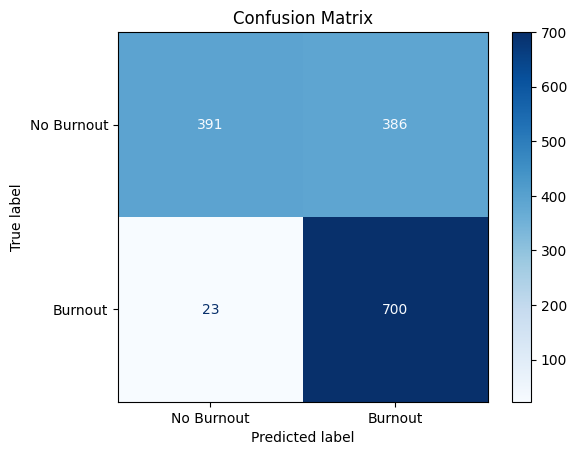

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

# One-hot encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features and target
X = df_encoded.drop('Mental_Health_Condition_Burnout', axis=1)
y = df_encoded['Mental_Health_Condition_Burnout']

# Save training columns for inference alignment
with open('training_columns.pkl', 'wb') as file:
    pickle.dump(X.columns, file)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Burnout', 'Burnout']))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['No Burnout', 'Burnout'], cmap='Blues'
)
plt.title("Confusion Matrix")
plt.show()


Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Social_Isolation_Rating', 'Company_Support_for_Remote_Work',
       'Gender_Male', 'Gender_Non-binary', 'Gender_Prefer not to say',
       'Job_Role_Designer', 'Job_Role_HR', 'Job_Role_Marketing',
       'Job_Role_Project Manager', 'Job_Role_Sales',
       'Job_Role_Software Engineer', 'Industry_Education', 'Industry_Finance',
       'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
       'Industry_Retail', 'Work_Location_Onsite', 'Work_Location_Remote',
       'Stress_Level_Low', 'Stress_Level_Medium',
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Access_to_Mental_Health_Resources_Yes', 'Productivity_Change_Increase',
       'Productivity_Change_No Change',
       'Satisfaction_with_Remote_Work_Satisfied',
       'Satisfaction_with_Remote_Work_Unsatisfied', 'Physical_Activity_Weekly',
       'Sle

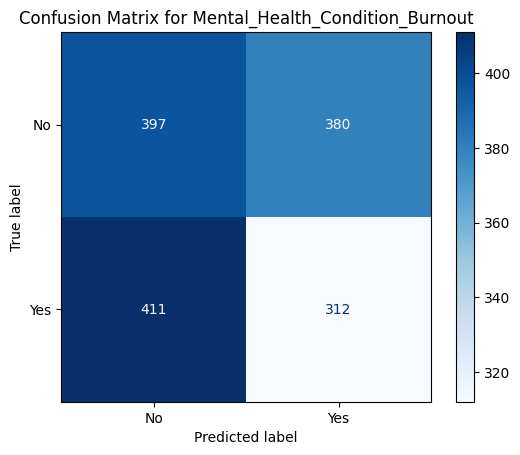

Classification Report for Mental_Health_Condition_Depression:
              precision    recall  f1-score   support

          No       0.75      1.00      0.85      1119
         Yes       0.00      0.00      0.00       381

    accuracy                           0.74      1500
   macro avg       0.37      0.50      0.43      1500
weighted avg       0.56      0.74      0.64      1500



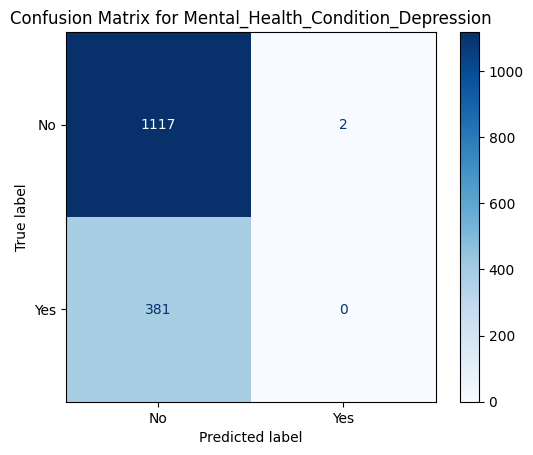

In [6]:
# Verify columns
print(df_encoded.columns)

# Define features (X) and multiple target variables (y)
target_columns = ['Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression']
X = df_encoded.drop(target_columns, axis=1)
y = df_encoded[target_columns]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize base model and MultiOutputClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_target_model = MultiOutputClassifier(rf_model, n_jobs=-1)

# Train the model
multi_target_model.fit(X_train, y_train)

# Predict on test set
y_pred = multi_target_model.predict(X_test)

# Evaluate the model for each target
for idx, target in enumerate(target_columns):
    print(f"Classification Report for {target}:")
    print(classification_report(y_test.iloc[:, idx], y_pred[:, idx], target_names=['No', 'Yes']))
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test.iloc[:, idx], 
        y_pred[:, idx], 
        display_labels=['No', 'Yes'], 
        cmap='Blues'
    )
    plt.title(f"Confusion Matrix for {target}")
    plt.show()

# Save the model
with open('multi_target_rf_model.pkl', 'wb') as file:
    pickle.dump(multi_target_model, file)
